In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv('Titanic.csv')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [ ]:
inputs = df.drop(['name', 'sibsp','parch', 'ticket', 'cabin', 'boat','body','home.dest','survived','embarked'], axis = 'columns')
targets = df['survived']

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
inputs

,pclass,sex,age,fare
0,1.0,female,29.0000,211.3375
1,1.0,male,0.9167,151.5500
2,1.0,female,2.0000,151.5500
3,1.0,male,30.0000,151.5500
4,1.0,female,25.0000,151.5500
...,...,...,...,...
1305,3.0,female,NaN,14.4542
1306,3.0,male,26.5000,7.2250
1307,3.0,male,27.0000,7.2250
1308,3.0,male,29.0000,7.8750


In [ ]:
le_pclass = LabelEncoder()
le_sex = LabelEncoder()
le_age = LabelEncoder()
le_fare = LabelEncoder()


In [ ]:
inputs['pclass_n'] = le_pclass.fit_transform(inputs['pclass'])
inputs['sex_n'] = le_pclass.fit_transform(inputs['sex'])
inputs['age_n'] = le_pclass.fit_transform(inputs['age'])
inputs['fare_n'] = le_pclass.fit_transform(inputs['fare'])


In [ ]:
inputs_n = inputs.drop(['pclass','sex','age','fare'], axis= 'columns')
inputs_n


,pclass_n,sex_n,age_n,fare_n
0,0,0,44,273
1,0,1,6,270
2,0,0,8,270
3,0,1,45,270
4,0,0,38,270
...,...,...,...,...
1305,2,0,98,111
1306,2,1,40,18
1307,2,1,41,18
1308,2,1,44,46


In [ ]:
# Remove rows where targets contain NaN
mask = ~np.isnan(targets)
inputs_n = inputs_n[mask]
targets = targets[mask]


In [ ]:
model.fit(inputs_n, targets)

DecisionTreeClassifier()

In [ ]:
# prompt: calculate the score of the model

model_score = model.score(inputs_n, targets)
print(f"Model score on clean data: {model_score}")


Model score on clean data: 0.9648586707410237


In [ ]:
from sklearn import tree

In [ ]:
model = tree.DecisionTreeClassifier()
model.fit(inputs_n,targets)

DecisionTreeClassifier()

In [ ]:
model.predict([[0,0,8,270]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0.])

## Alternative way is to split the dataset into training and testing set


In [ ]:
# prompt: split dataset into training and testing sets

from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(inputs_n, targets, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


Training set size: 785
Testing set size: 524


In [ ]:
# prompt: train the model


model.fit(X_train, y_train)


DecisionTreeClassifier()

In [ ]:
# prompt: calcucalte the training score

model.score(X_train, y_train)


0.975796178343949

In [ ]:
# prompt: evaluate the test set

model.score(X_test, y_test)


0.75

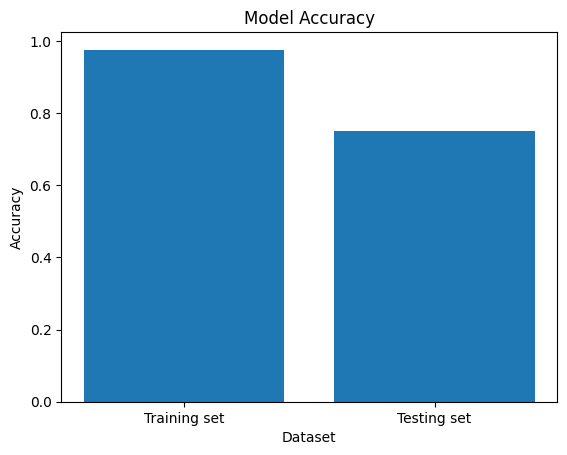

In [ ]:
# prompt: compare the 2 result be sure to  use visualization

import matplotlib.pyplot as plt

# Create a list of all the scores
scores = [model.score(X_train, y_train), model.score(X_test, y_test)]

# Create a bar chart of the scores
plt.bar(["Training set", "Testing set"], scores)

# Add title and axis labels
plt.title("Model Accuracy")
plt.xlabel("Dataset")
plt.ylabel("Accuracy")

# Show the plot
plt.show()
